# masuk drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pilih tensorflow versi 1
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
# cek versi tensorflow
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
# ke direktori 
%cd '/content/drive/My Drive/TA2'

/content/drive/My Drive/TA2


In [ ]:
# cek direktori sekarang berada
%pwd

'/content/drive/My Drive/TA2'

In [ ]:
!pip install pillow
!pip install lxml
!pip install Cython
!pip install jupyter
!pip install matplotlib
!pip install pandas
!pip install opencv-python
# !pip install tensorflow
# !pip install tensorflow==1.14

In [ ]:
import tensorflow.compat as tf

In [ ]:
%cd /content/drive/My Drive/TA2/models/research/object_detection

/content/drive/My Drive/TA2/models/research/object_detection


## export the PYTHONPATH environment variable with the models, reasearch and slim path

In [ ]:
%pwd

'/content/drive/My Drive/TA2/models/research/object_detection'

In [ ]:
import os
os.environ['PYTHONPATH'] = "{}/content/drive/My Drive/TA2/models:/content/drive/My Drive/TA2/models/research:/content/drive/My Drive/TA2/models/research/slim".format(os.environ['PYTHONPATH'])

In [ ]:
%cd ..
# download protocol buffer
!protoc ./object_detection/protos/*.proto --python_out=.

/content/drive/My Drive/TA2/models/research


In [ ]:
# cek versi protobuf
!protoc --version

libprotoc 3.0.0


In [ ]:
# harus berada di direktori research
%pwd

'/content/drive/My Drive/TA2/models/research'

In [ ]:
!python3 setup.py build
!python3 setup.py install

running build
running build_py
copying object_detection/__init__.py -> build/lib/object_detection
copying object_detection/download_and_convert_data.py -> build/lib/object_detection
copying object_detection/eval_image_classifier.py -> build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/object_detection
copying object_detection/export_inference_graph_test.py -> build/lib/object_detection
copying object_detection/setup.py -> build/lib/object_detection
copying object_detection/train_image_classifier.py -> build/lib/object_detection
copying object_detection/my_inference_graph.py -> build/lib/object_detection
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_de

In [ ]:
!pip install tensorflow-object-detection-api==1.14

ERROR: Could not find a version that satisfies the requirement tensorflow-object-detection-api==1.14 (from versions: 0.1, 0.1.1)
ERROR: No matching distribution found for tensorflow-object-detection-api==1.14


In [ ]:
!pip install tf_slim

     |████████████████████████████████| 358kB 9.4MB/s 


In [ ]:
# harus berada di research
%pwd

'/content/drive/My Drive/TA2/models/research'

In [ ]:
%cd /content/drive/My Drive/TA2/models/research/object_detection/

/content/drive/My Drive/TA2/models/research/object_detection


In [ ]:
!cp -a ../slim/. .

In [ ]:
%pwd

'/content/drive/My Drive/TA2/models/research/object_detection'

In [ ]:
!python my_inference_graph.py \
--input_type image_tensor \
--pipeline_config_path training/faster_rcnn_inception_v2.config \
--trained_checkpoint_prefix training/model.ckpt-5000 \
--output_directory ./inference_graph 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0717 07:19:31.580996 139635035010944 module_wrapper.py:139] From my_inference_graph.py:41: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Instructions for updating:
Please use `layer.__call__` method instead.
W0717 07:19:32.026247 139635035010944 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:2802: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:Scale of 0 disables regularizer.
I0717 07:19:33.203918 13

#### kode upload gambar dari internet

In [ ]:
!wget 'https://s2.bukalapak.com/uploads/content_attachment/2f436aa9b50e1b359925aaa5/original/Intel_core_i7.jpg'  -O semaforo.png

#### kode pengujian gambar

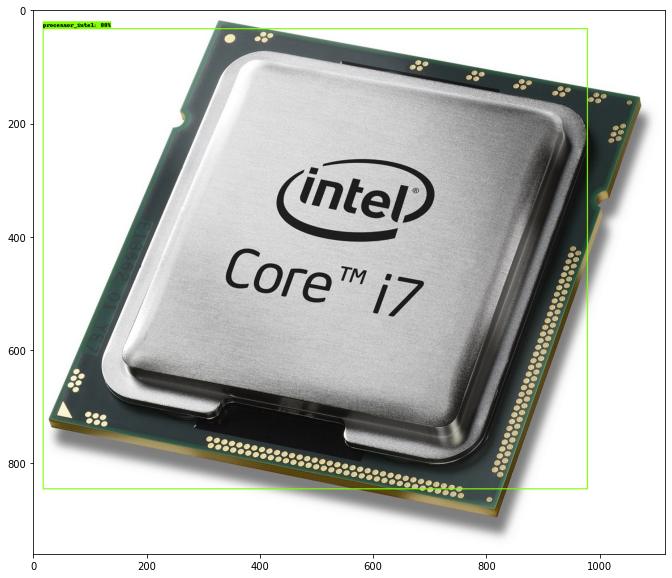

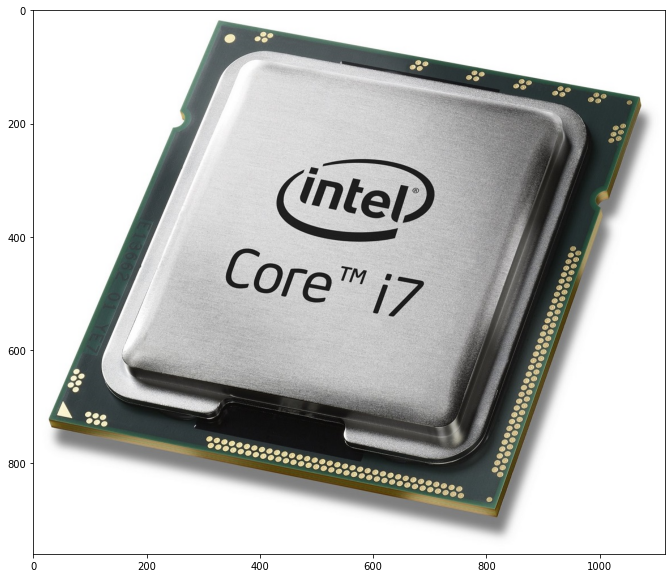

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2


from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

# This is needed to display the images.
%matplotlib inline

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'semaforo.png'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 4

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=4, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
# category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')


# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=2,
    min_score_thresh=0.6),
    


import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.imshow(image)

image = cv2.imread(PATH_TO_IMAGE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(image)

In [ ]:
def GetClassName(data):
  nama = []
  for cl in data:
    # nama.append(cl['name'].replace(" ", "+"))
    nama.append(cl['name'].replace(" ","%20"))
  all='%2C'.join(nama)
  return all
# with tf.device('/device:GPU:0'):
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2


from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

with tf.device('/device:GPU:0'):
  # This is needed since the notebook is stored in the object_detection folder.
  sys.path.append("..")
  from object_detection.utils import ops as utils_ops

  # This is needed to display the images.
  %matplotlib inline

  # Import utilites
  from utils import label_map_util
  from utils import visualization_utils as vis_util

  # Name of the directory containing the object detection module we're using
  MODEL_NAME = 'inference_graph'
  # IMAGE_NAME = 'download (1).jpg'
  IMAGE_NAME = 'semaforo.png'

  # Grab path to current working directory
  CWD_PATH = os.getcwd()

  # Path to frozen detection graph .pb file, which contains the model that is used
  # for object detection.
  PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

  # Path to label map file
  PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

  # Path to image
  PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

  # Number of classes the object detector can identify
  NUM_CLASSES = 4

  label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
  categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
  category_index = label_map_util.create_category_index(categories)

  # Load the Tensorflow model into memory.
  detection_graph = tf.Graph()
  with detection_graph.as_default():
      od_graph_def = tf.GraphDef()
      with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
          serialized_graph = fid.read()
          od_graph_def.ParseFromString(serialized_graph)
          tf.import_graph_def(od_graph_def, name='')

      sess = tf.Session(graph=detection_graph)

  # Define input and output tensors (i.e. data) for the object detection classifier

  # Input tensor is the image
  image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

  # Output tensors are the detection boxes, scores, and classes
  # Each box represents a part of the image where a particular object was detected
  detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

  # Each score represents level of confidence for each of the objects.
  # The score is shown on the result image, together with the class label.
  detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
  detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

  # Number of objects detected
  num_detections = detection_graph.get_tensor_by_name('num_detections:0')


  # Load image using OpenCV and
  # expand image dimensions to have shape: [1, None, None, 3]
  # i.e. a single-column array, where each item in the column has the pixel RGB value
  image = cv2.imread(PATH_TO_IMAGE)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_expanded = np.expand_dims(image, axis=0)

  # Perform the actual detection by running the model with the image as input
  (boxes, scores, classes, num) = sess.run(
      [detection_boxes, detection_scores, detection_classes, num_detections],
      feed_dict={image_tensor: image_expanded})

  # Draw the results of the detection (aka 'visulaize the results')

  vis_util.visualize_boxes_and_labels_on_image_array(
      image,
      np.squeeze(boxes),
      np.squeeze(classes).astype(np.int32),
      np.squeeze(scores),
      category_index,
      use_normalized_coordinates=True,
      line_thickness=7,
      min_score_thresh=0.2),
    
  #import matplotlib.pyplot as plt
  #%matplotlib inline

  #plt.figure(figsize=(20,10))
  #plt.imshow(image)

  data = [category_index.get(value) for index,value in enumerate(classes[0]) if scores[0,index] > 0.6]
  # print(data)

  cari = 'https://www.google.com/search?q='+GetClassName(data)+'&safe=strict&source=lnms&tbm=isch'
  print(cari)

https://www.google.com/search?q=processor_intel&safe=strict&source=lnms&tbm=isch


## selenium untuk scraping

### install

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 8.1MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://security.ubuntu.co

In [ ]:
if (GetClassName(data)=='processor_intel'):
  key = 'processor%20intel'
else:
  key = GetClassName(data)

### BUKALAPAK SCRAPE

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from time import sleep
item_cost2= []
try:
  iter = int(input("Berapa page : "))
except:
  print('bukan angka')
for i in range(iter):
  base_url = "https://www.bukalapak.com/products?page="+str(i+1)+"&search%5Bkeywords%5D="+key
  print(base_url)
# create object for chrome options
  chrome_options = Options()
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36")
  browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
  browser.get(base_url)
  html = browser.page_source 
  delay = 10 #secods

  # declare empty lists
 
  while True:
      try:
          WebDriverWait(browser, delay)
          print ("Page is ready")
          sleep(10)
          html = browser.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
          #print(html)
          soup = BeautifulSoup(html, "html.parser")

          # find the price of items
          for item_c in soup.find_all("p", class_="bl-text bl-text--subheading-2 bl-text--semi-bold bl-text--ellipsis__1"):
              print(item_c.get_text())
              item_cost2.append(item_c.text)

          break # it will break from the loop once the specific element will be present. 
      except TimeoutException:
          print ("Loading took too much time!-Try again")

Berapa page : 2
https://www.bukalapak.com/products?page=1&search%5Bkeywords%5D=processor%20intel


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: use options instead of chrome_options


Page is ready

          Rp635.000
        

          Rp1.350.000
        

          Rp4.000.000
        

          Rp50.000
        

          Rp150.000
        

          Rp195.000
        

          Rp375.000
        

          Rp840.000
        

          Rp240.000
        

          Rp200.000
        
https://www.bukalapak.com/products?page=2&search%5Bkeywords%5D=processor%20intel


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: use options instead of chrome_options


Page is ready

          Rp1.700.000
        

          Rp1.575.000
        

          Rp100.000
        

          Rp3.000.000
        

          Rp315.000
        

          Rp275.000
        

          Rp450.000
        

          Rp675.000
        

          Rp165.000
        

          Rp1.100.000
        


#### NORMALISASI

In [ ]:
hargaBukalapak = []
for datum in item_cost2:
  titik=datum.replace('.', '')
  dat=titik.replace('Rp','')
  hargaBukalapak.append(int(dat))

In [ ]:
print(hargaBukalapak)

[635000, 1350000, 4000000, 50000, 150000, 195000, 375000, 840000, 240000, 200000, 1700000, 1575000, 100000, 3000000, 315000, 275000, 450000, 675000, 165000, 1100000]


### TOKOPEDIA

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from time import sleep
item_cost3= []

for i in range(iter):
  # name = link.replace(" ", "%20")
  # kata_kunci = 'servo%20sg90%2C%20servo%20sg90'
  base_url = 'https://www.tokopedia.com/search?page='+str(i+1)+'&q='+key+'&st=product'
# create object for chrome options
  chrome_options = Options()
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36")
  browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
  browser.get(base_url)
  delay = 10 #secods

  # declare empty lists
  print(base_url)
  while True:
      try:
          WebDriverWait(browser, delay)
          print ("Page is ready")
          sleep(10)
          html = browser.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
          #print(html)
          soup = BeautifulSoup(html, "html.parser")

          # find the price of items
          # for item_c in soup.find_all('div', class_='css-o4jah1'):
          for item_c in soup.find_all('div', class_='css-rhd610'): 
              print(item_c.get_text())
              item_cost3.append(item_c.text)

          break # it will break from the loop once the specific element will be present. 
      except TimeoutException:
          print ("Loading took too much time!-Try again")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


https://www.tokopedia.com/search?page=1&q=processor%20intel&st=product
Page is ready
Rp300.000
Rp1.525.000
Rp865.000
Rp1.480.000
Rp120.000
Rp598.000
Rp2.099.000
Rp2.089.000
Rp2.839.000
Rp2.349.000
Rp600.000
Rp630.000
Rp228.000
Rp1.399.000
Rp289.000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


https://www.tokopedia.com/search?page=2&q=processor%20intel&st=product
Page is ready
Rp3.700.000
Rp10.670.000
Rp10.750.000
Rp1.550.000
Rp165.000
Rp50.000
Rp110.000
Rp350.000
Rp260.000
Rp1.569.000
Rp1.325.000
Rp30.000
Rp1.750.000
Rp2.349.000
Rp488.000


In [ ]:
hargaTokopedia = []
for datum in item_cost3:
  titik=datum.replace('.', '')
  dat=titik.replace('Rp','')
  hargaTokopedia.append(int(dat))
print(hargaTokopedia)

[300000, 1525000, 865000, 1480000, 120000, 598000, 2099000, 2089000, 2839000, 2349000, 600000, 630000, 228000, 1399000, 289000, 3700000, 10670000, 10750000, 1550000, 165000, 50000, 110000, 350000, 260000, 1569000, 1325000, 30000, 1750000, 2349000, 488000]


In [ ]:
print('jumlah page yang di-scraping')
print(iter)
print('harga terendah di tokopedia')
print(min(hargaTokopedia))
print('harga terendah di bukalapak')
print(min(hargaBukalapak))
print('harga tertinggi di tokopedia')
print(max(hargaTokopedia))
print('harga tertinggi di bukalapak')
print(max(hargaBukalapak))
import statistics
print('Rara-rata harga Bukalapak')
print(statistics.mean(hargaBukalapak))
print('Rata-rata harga Tokopedia')
print(statistics.mean(hargaTokopedia))
print('jumlah data harga yang terscraping di Bukalapak ada')
print(len(hargaBukalapak))
print('jumlah data harga yang terscraping di Tokopedia ada')
print(len(hargaTokopedia))

jumlah page yang di-scraping
2
harga terendah di tokopedia
30000
harga terendah di bukalapak
50000
harga tertinggi di tokopedia
10750000
harga tertinggi di bukalapak
4000000
Rara-rata harga Bukalapak
869500
Rata-rata harga Tokopedia
1750866.6666666667
jumlah data harga yang terscraping di Bukalapak ada
20
jumlah data harga yang terscraping di Tokopedia ada
30
